In [91]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

pd.options.display.max_columns = None


In [92]:
df = pd.read_csv("creditcardmarketing.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       18000 non-null  int64  
 1   1       18000 non-null  object 
 2   2       18000 non-null  object 
 3   3       18000 non-null  object 
 4   4       18000 non-null  object 
 5   5       18000 non-null  int64  
 6   6       18000 non-null  object 
 7   7       18000 non-null  object 
 8   8       18000 non-null  int64  
 9   9       18000 non-null  int64  
 10  10      18000 non-null  int64  
 11  11      18000 non-null  object 
 12  12      17976 non-null  float64
 13  13      17976 non-null  float64
 14  14      17976 non-null  float64
 15  15      17976 non-null  float64
 16  16      17976 non-null  float64
dtypes: float64(5), int64(5), object(7)
memory usage: 2.3+ MB


In [94]:
col = ["Customer_Number","Offer_Accepted","Reward","Mailer_Type","Income_Level","Bank_Accounts_Open","Overdraft_Protection","Credit_Rating","Credit_Cards_Held","Homes_Owned","Household_Size","Own_Your_Home","Q1","Q2","Q3","Q4","Balance"]

In [95]:
df.columns = col

In [96]:
df

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Q1,Q2,Q3,Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       18000 non-null  int64  
 1   Offer_Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer_Type           18000 non-null  object 
 4   Income_Level          18000 non-null  object 
 5   Bank_Accounts_Open    18000 non-null  int64  
 6   Overdraft_Protection  18000 non-null  object 
 7   Credit_Rating         18000 non-null  object 
 8   Credit_Cards_Held     18000 non-null  int64  
 9   Homes_Owned           18000 non-null  int64  
 10  Household_Size        18000 non-null  int64  
 11  Own_Your_Home         18000 non-null  object 
 12  Q1                    17976 non-null  float64
 13  Q2                    17976 non-null  float64
 14  Q3                    17976 non-null  float64
 15  Q4                 

In [98]:
df.isnull().sum()

Customer_Number          0
Offer_Accepted           0
Reward                   0
Mailer_Type              0
Income_Level             0
Bank_Accounts_Open       0
Overdraft_Protection     0
Credit_Rating            0
Credit_Cards_Held        0
Homes_Owned              0
Household_Size           0
Own_Your_Home            0
Q1                      24
Q2                      24
Q3                      24
Q4                      24
Balance                 24
dtype: int64

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.75,9000.5,13500.25,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
Q1,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
Q2,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
Q3,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
Q4,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


In [100]:
df.describe(include=object).T

,count,unique,top,freq
Offer_Accepted,18000,2,No,16977
Reward,18000,3,Air Miles,6061
Mailer_Type,18000,2,Postcard,9147
Income_Level,18000,3,Medium,9013
Overdraft_Protection,18000,2,No,15322
Credit_Rating,18000,3,High,6071
Own_Your_Home,18000,2,Yes,11655


In [101]:
df.duplicated().sum()

0

# Tratamiento de Nulos

In [102]:
df_med = df.copy()
df_it = df.copy()
df_knn = df.copy()

In [103]:
df.stb.missing()

,missing,total,percent
Balance,24,18000,0.133333
Q4,24,18000,0.133333
Q3,24,18000,0.133333
Q2,24,18000,0.133333
Q1,24,18000,0.133333
Homes_Owned,0,18000,0.000000
Own_Your_Home,0,18000,0.000000
Household_Size,0,18000,0.000000
Customer_Number,0,18000,0.000000
Offer_Accepted,0,18000,0.000000


In [104]:
columnas_nulas = ["Q1","Q2", "Q3", "Q4", "Balance"]

for column in columnas_nulas:
    df_med[column].replace(np.nan, df[column].median(), inplace=True)

In [105]:
imputer = IterativeImputer()
numericas = df_it.select_dtypes(include = np.number)
imputer.fit(numericas)

IterativeImputer()

In [106]:
df_prueba= df_it.select_dtypes(include="object")

df = pd.concat([df_prueba, df_iterative], axis=1)
df.head()

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Overdraft_Protection,Credit_Rating,Own_Your_Home,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Q1,Q2,Q3,Q4,Balance
0,No,Air Miles,Letter,High,No,High,No,1.0,1.0,2.0,1.0,4.0,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,No,Medium,Yes,2.0,1.0,2.0,2.0,5.0,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,No,Medium,Yes,3.0,2.0,2.0,1.0,2.0,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,No,High,No,4.0,2.0,1.0,1.0,4.0,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,No,Medium,Yes,5.0,1.0,2.0,1.0,6.0,1211.00,2140.0,1357.0,982.0,365.0


# Análisis

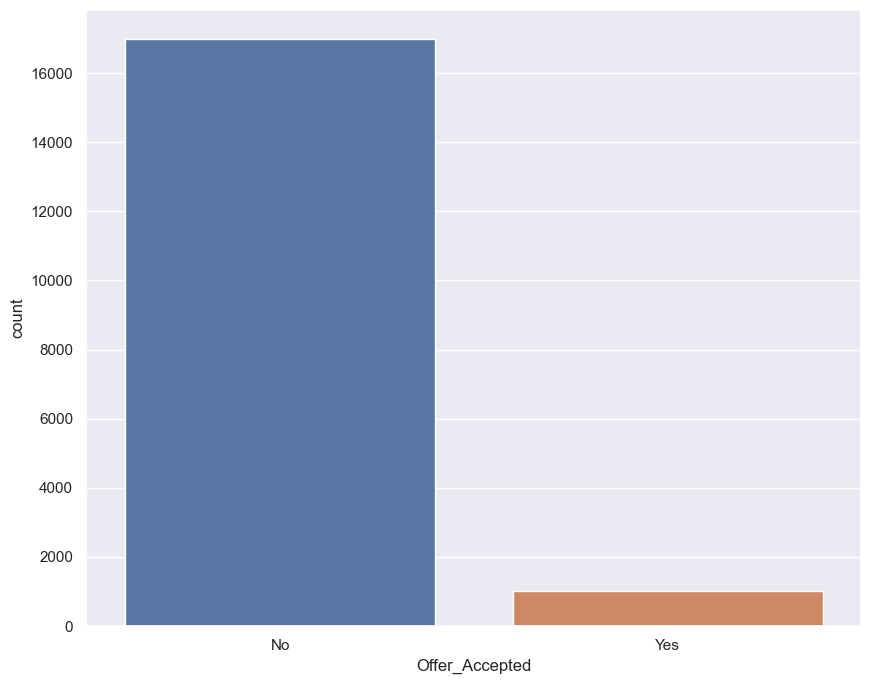

In [107]:
sns.countplot(data = df,
             x = "Offer_Accepted");

In [108]:
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.7500,9000.5,13500.2500,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.0000,1.0,1.0000,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.0000,2.0,2.0000,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.0000,1.0,1.0000,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.0000,3.0,4.0000,9.00
Q1,18000.0,940.515562,350.064214,48.25,787.9375,1006.5,1152.5625,3366.25
Q2,18000.0,910.450656,619.663515,0.00,393.0000,773.0,1520.2500,3450.00
Q3,18000.0,999.392190,457.097214,0.00,664.0000,1032.0,1342.0000,3421.00
Q4,18000.0,1042.033600,553.083487,0.00,633.0000,946.0,1462.0000,3823.00
Balance,18000.0,810.185803,558.628553,0.00,363.7500,704.0,1211.0000,4215.00


In [109]:
df.describe(include = "object").T


,count,unique,top,freq
Offer_Accepted,18000,2,No,16977
Reward,18000,3,Air Miles,6061
Mailer_Type,18000,2,Postcard,9147
Income_Level,18000,3,Medium,9013
Overdraft_Protection,18000,2,No,15322
Credit_Rating,18000,3,High,6071
Own_Your_Home,18000,2,Yes,11655


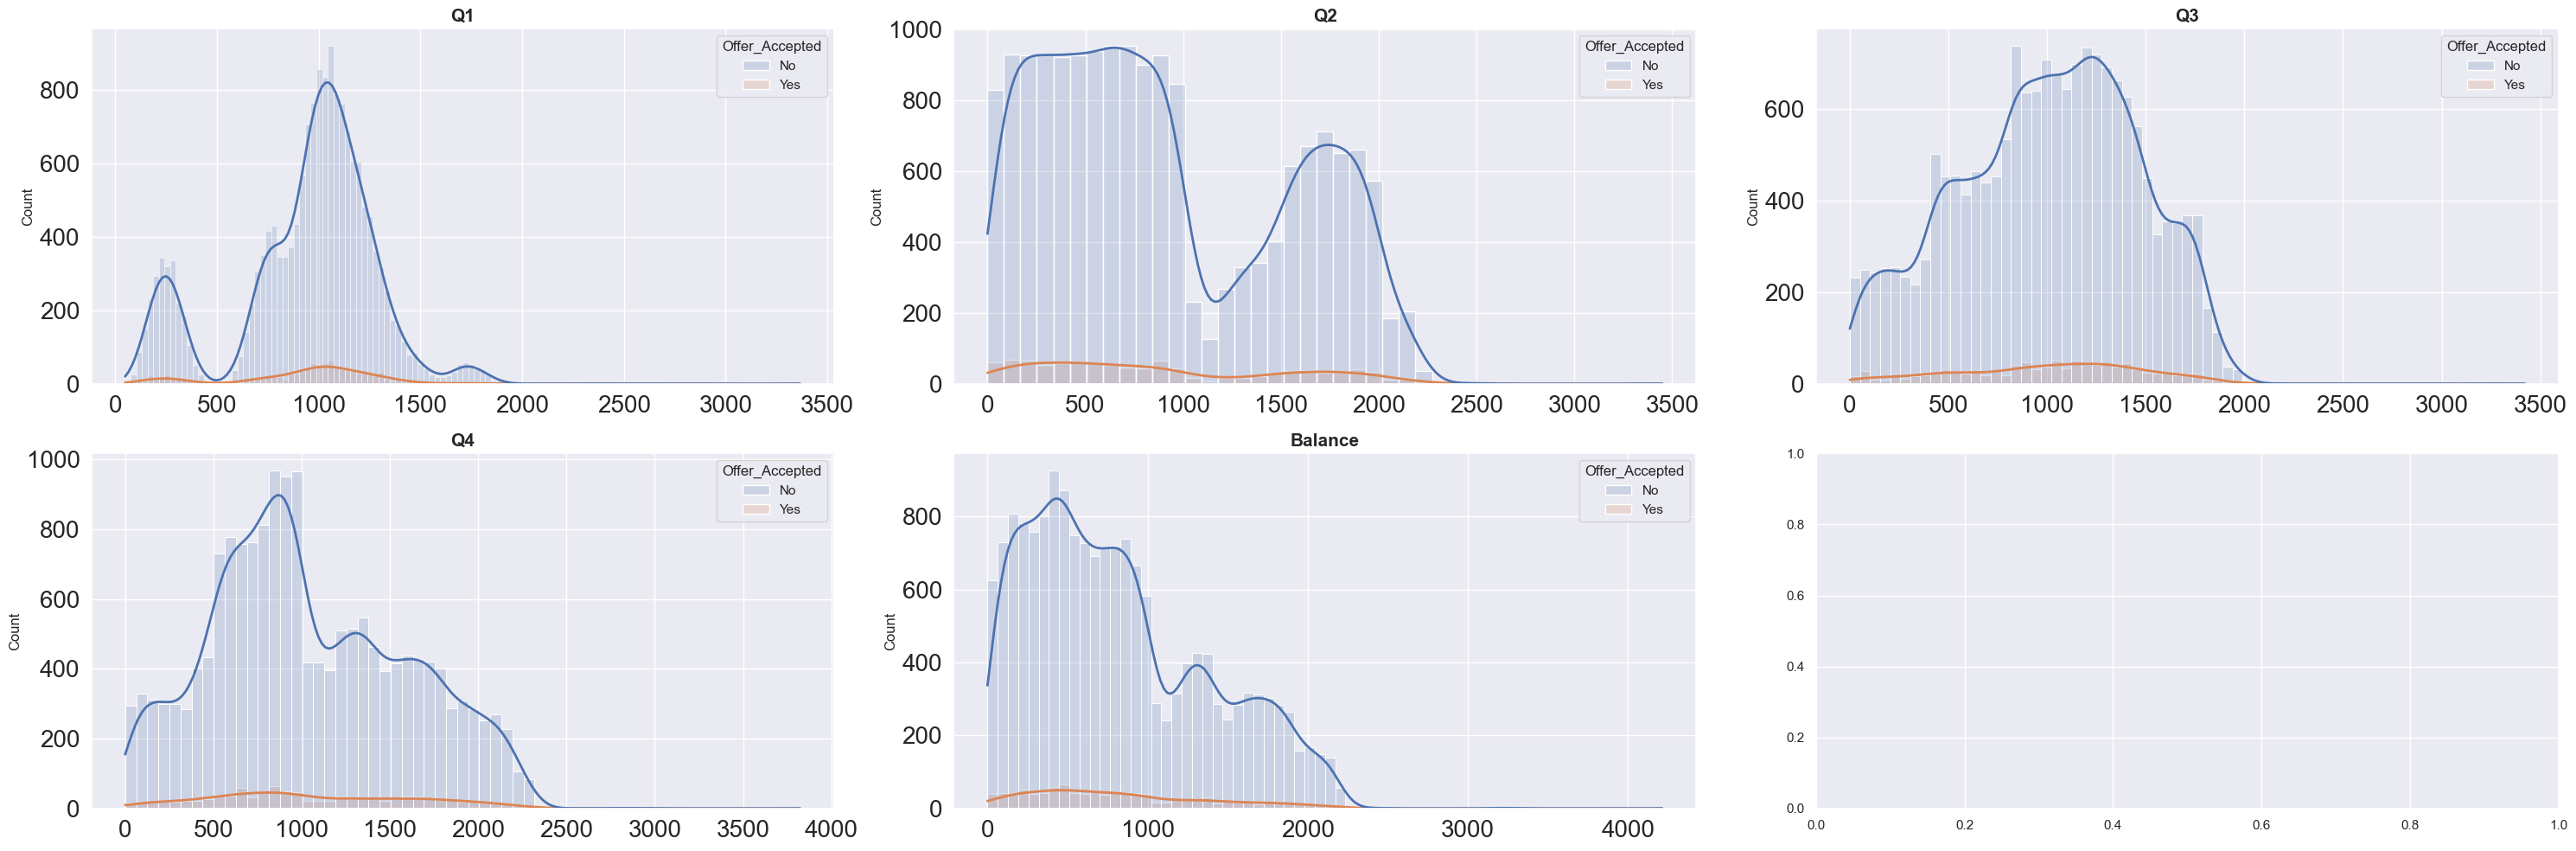

In [110]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df.drop(["Customer_Number","Bank_Accounts_Open","Credit_Cards_Held","Homes_Owned","Household_Size"], axis=1).select_dtypes(include = np.number)

for i, colum in enumerate(columnas_numeric.columns): 
    sns.histplot(
        data = columnas_numeric,
        hue = df["Offer_Accepted"],
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

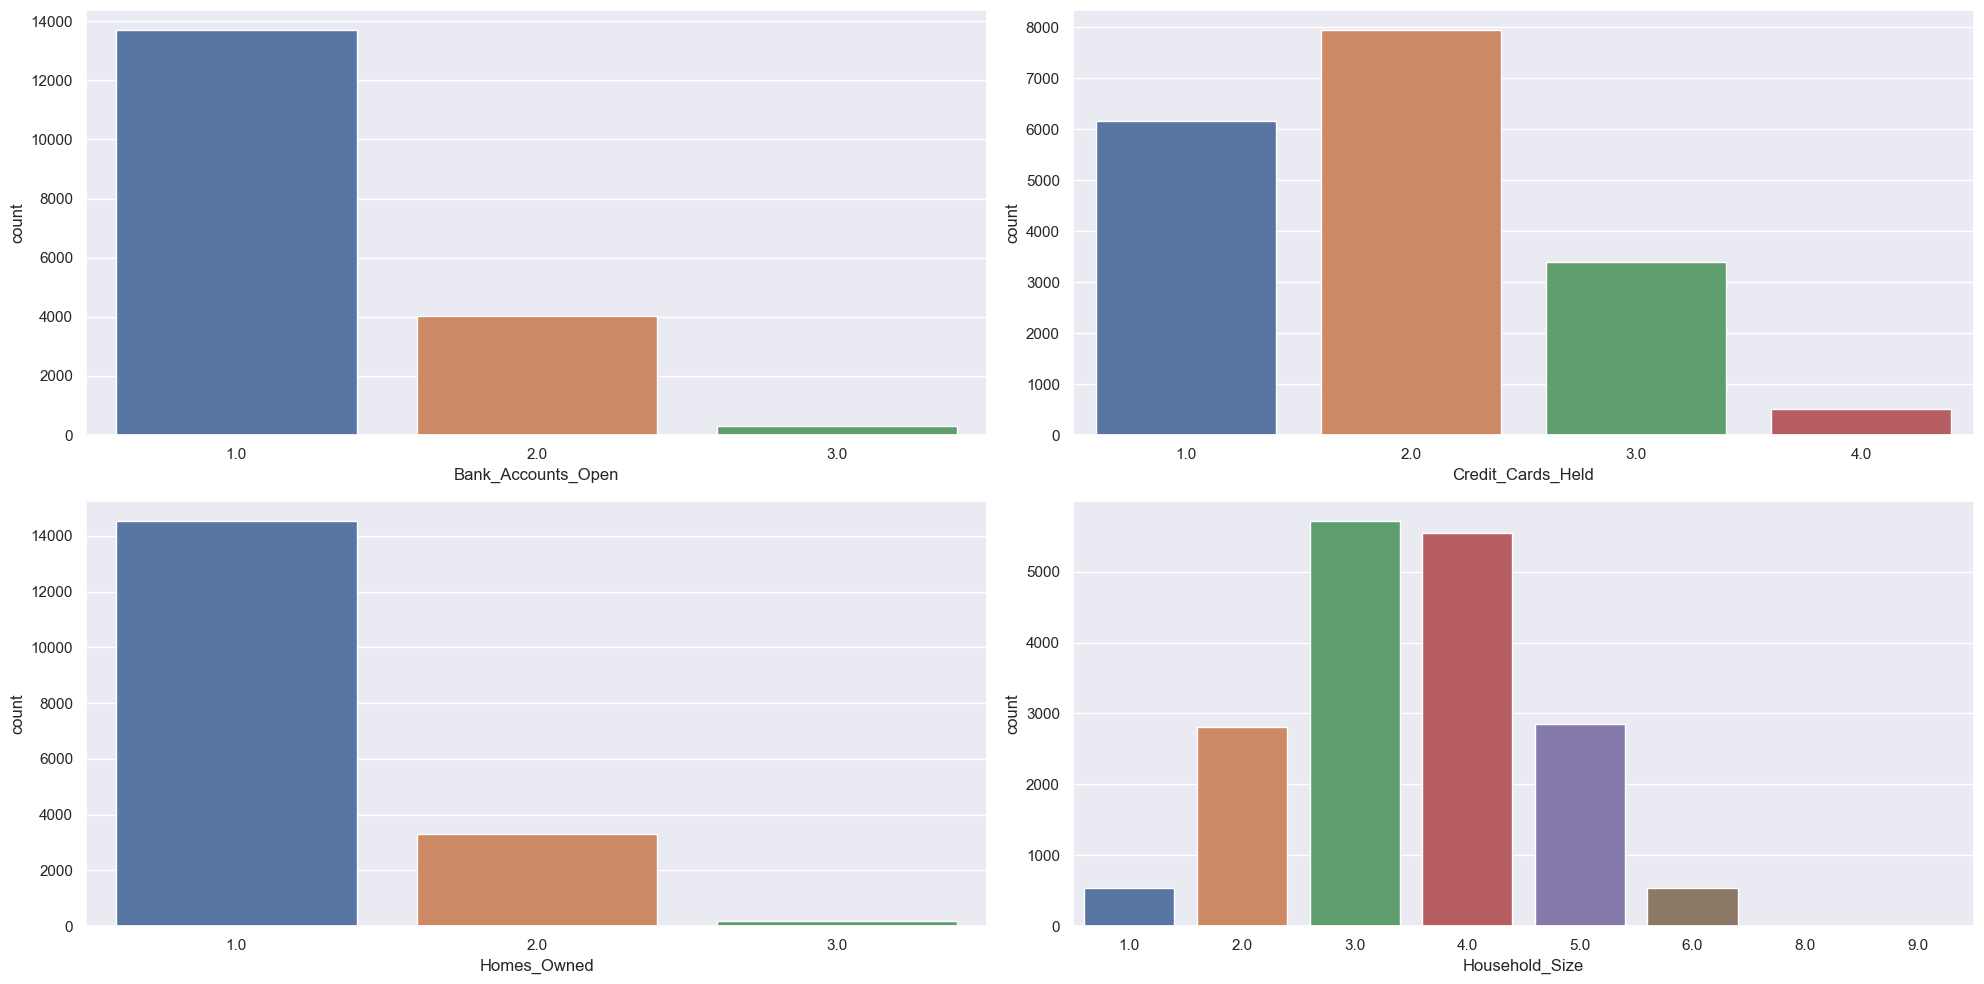

In [111]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))


axes = axes.flat

columnas_numeric = df[["Bank_Accounts_Open","Credit_Cards_Held","Homes_Owned","Household_Size"]]

for i, colum in enumerate(columnas_numeric):
    sns.countplot(
                x = df[colum], 
                ax = axes[i])

fig.tight_layout();

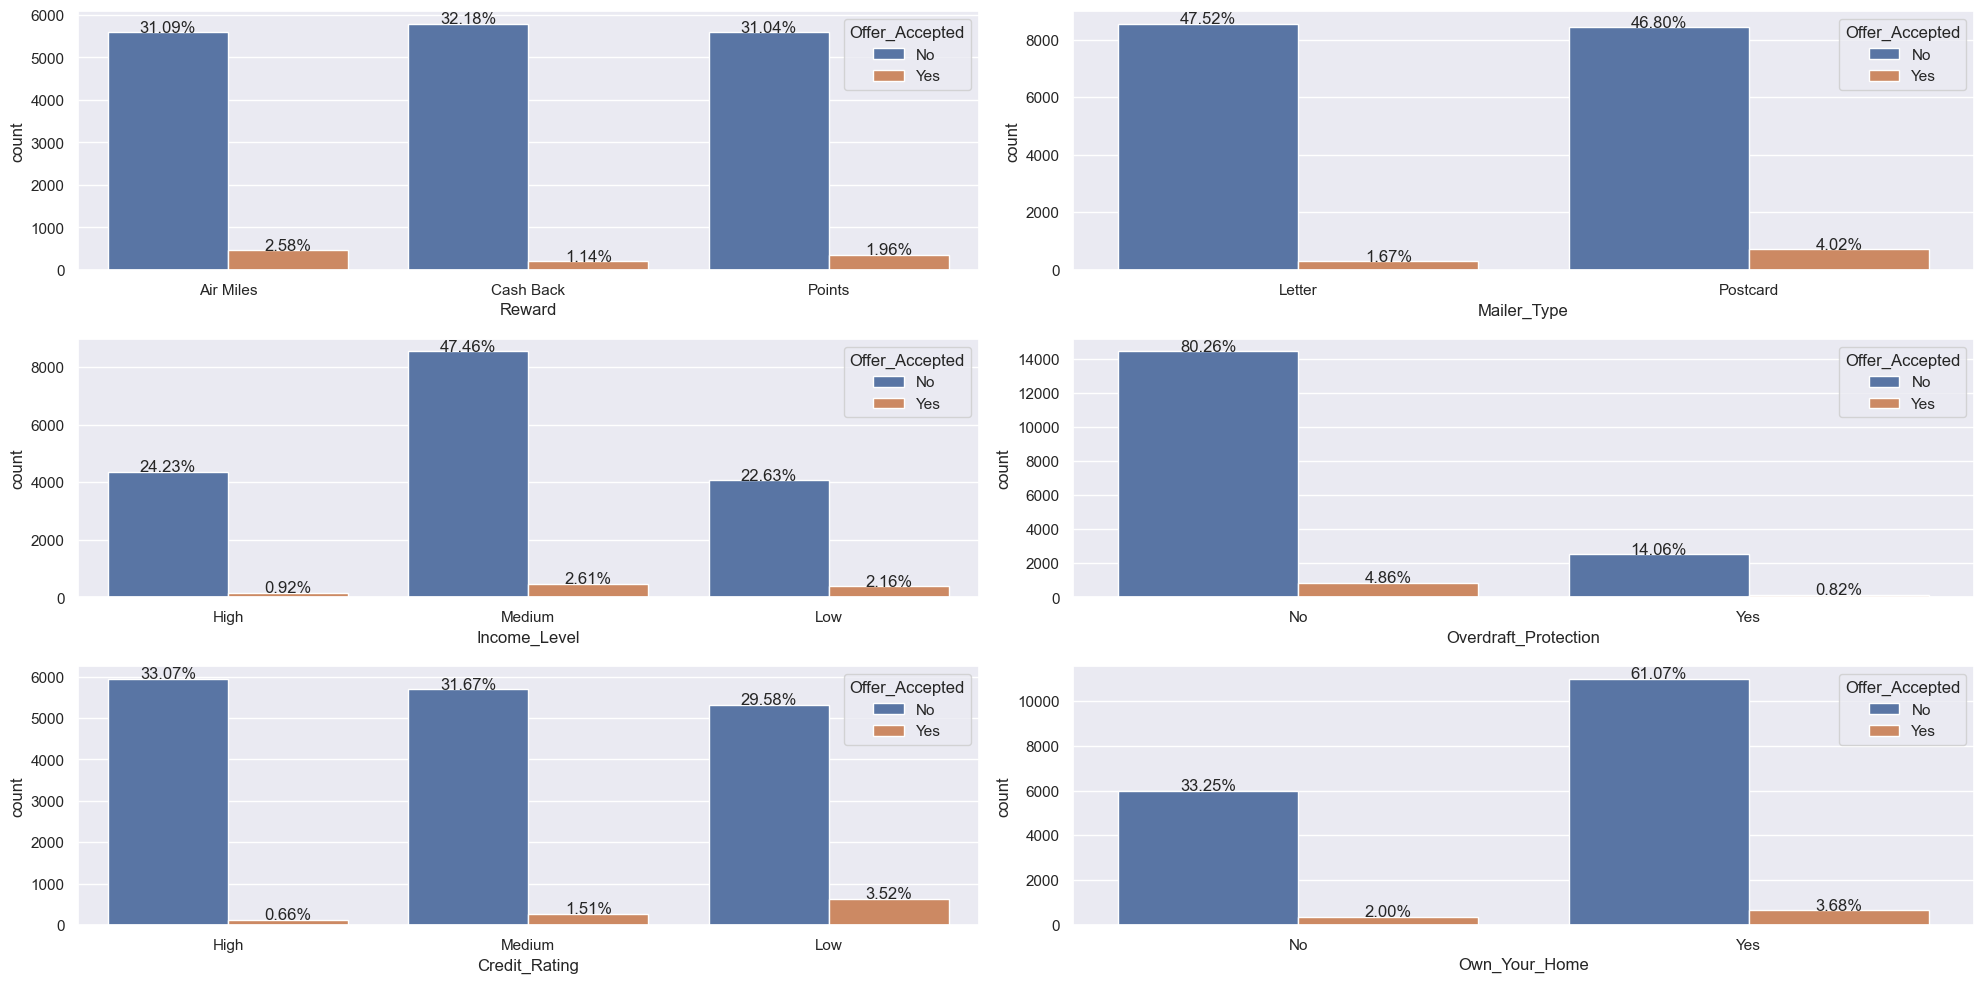

In [112]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 10))

axes = axes.flat

columnas_numeric = df.drop(["Offer_Accepted"], axis=1).select_dtypes(include = "object")

for i, colum in enumerate(columnas_numeric):
    
    chart = sns.countplot(
                x = df[colum],
                hue= df["Offer_Accepted"],
                ax = axes[i])
    
    total = float(len(df[colum]))
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha='center')

fig.tight_layout();

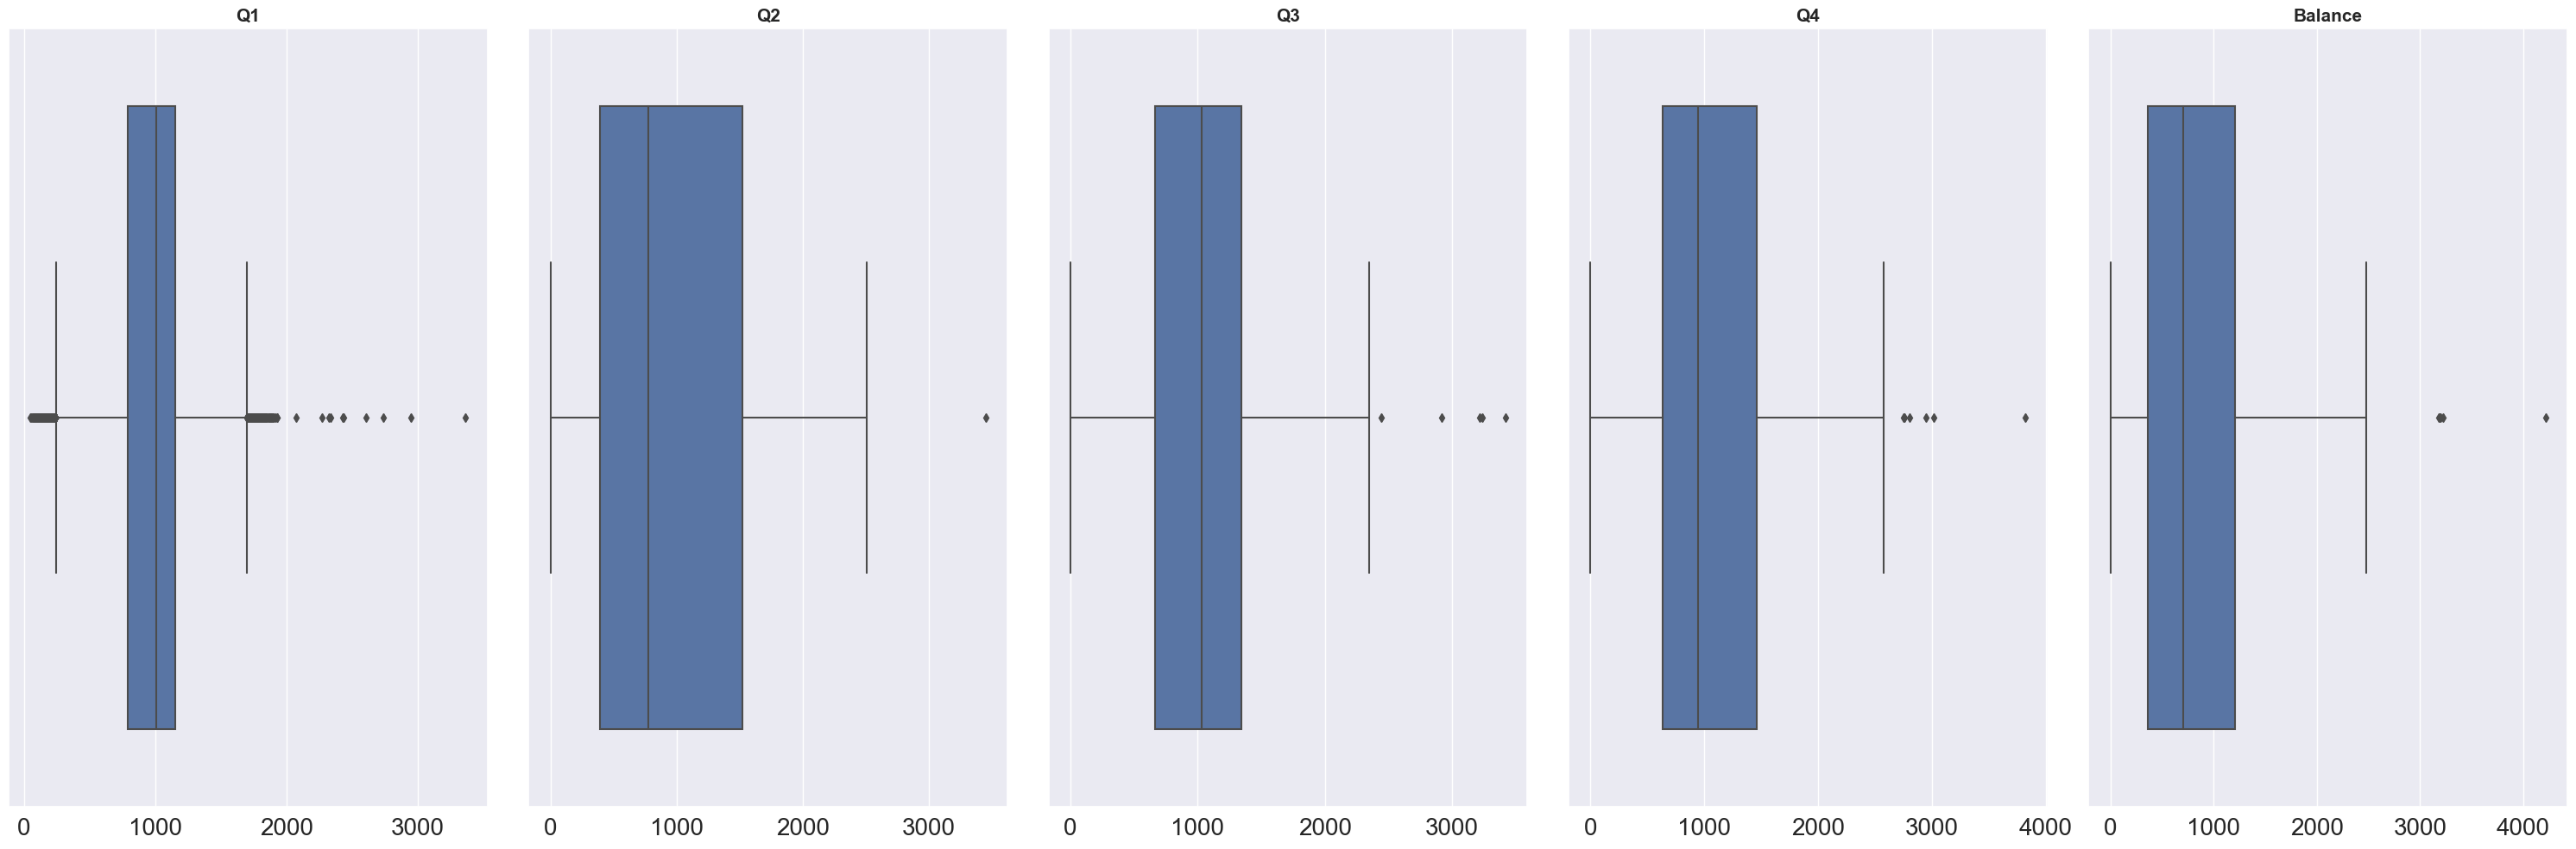

In [113]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df.drop(["Customer_Number","Bank_Accounts_Open","Credit_Cards_Held","Homes_Owned","Household_Size"], axis=1).select_dtypes(include = np.number)

for i, colum in enumerate(columnas_numeric.columns): 
    sns.boxplot(
        data = df,
        x = colum,  
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

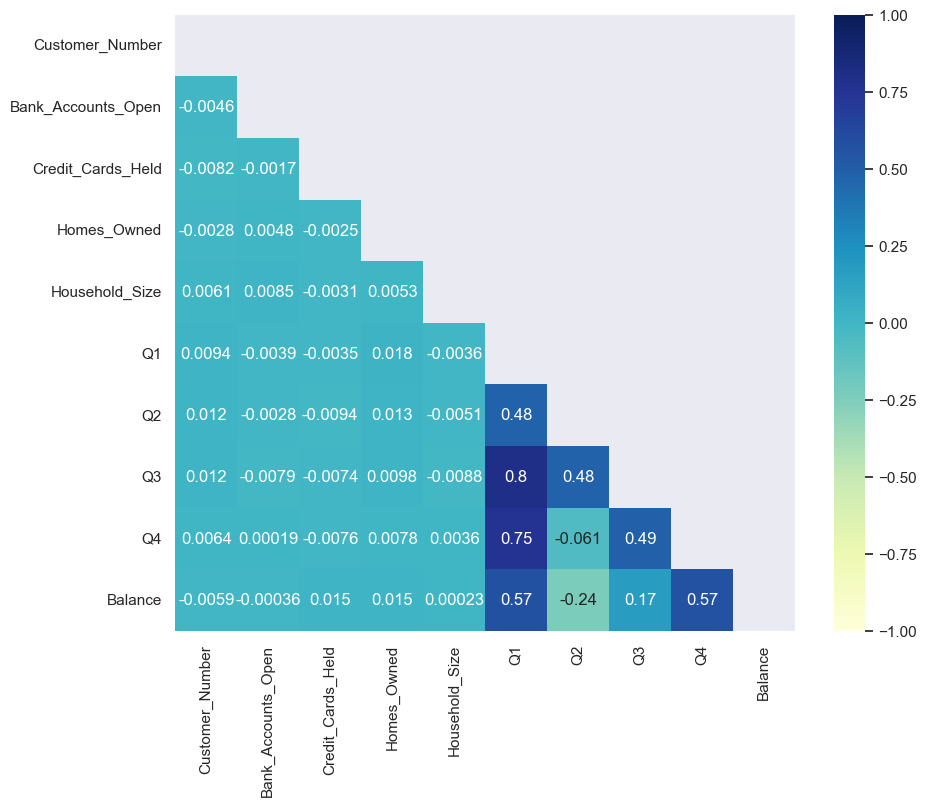

In [114]:
mask = np.triu(np.ones_like(df.corr()))

sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True,
           vmin = -1,
           vmax= 1);

In [115]:
df_RS= df.copy()

In [116]:
df_numeric = df.select_dtypes(include = np.number)
df_numeric.drop(['Customer_Number',"Bank_Accounts_Open","Credit_Cards_Held","Homes_Owned","Household_Size"], axis=1, inplace=True)
columnas_num=df_numeric.columns
columnas_num

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Balance'], dtype='object')

In [117]:
robust = RobustScaler()

robust.fit(df[columnas_num])

X_robust = robust.transform(df[columnas_num])

df_RS[columnas_num] = X_robust
df_RS.head()

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Overdraft_Protection,Credit_Rating,Own_Your_Home,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Q1,Q2,Q3,Q4,Balance
0,No,Air Miles,Letter,High,No,High,No,1.0,1.0,2.0,1.0,4.0,0.423037,0.794855,-0.228614,0.179735,0.351726
1,No,Air Miles,Letter,Medium,No,Medium,Yes,2.0,1.0,2.0,2.0,5.0,-2.356531,-0.651142,-1.365782,-1.047045,-0.398938
2,No,Air Miles,Postcard,High,No,Medium,Yes,3.0,2.0,2.0,1.0,2.0,-2.002057,-0.360169,-1.002950,-0.966224,-0.545294
3,No,Air Miles,Letter,Medium,No,High,No,4.0,2.0,1.0,1.0,4.0,0.582791,0.714127,1.073746,0.208685,-0.336382
4,No,Air Miles,Letter,Medium,No,Medium,Yes,5.0,1.0,2.0,1.0,6.0,0.560850,1.212686,0.479351,0.043426,-0.400118


In [118]:
df2 = df.copy()

In [119]:

def one_hot_encoder(dff, columnas):
    
    '''
    columnas: lista
    '''
    
    oh = OneHotEncoder()

    for col in columnas:
    
        transformados = oh.fit_transform(dff[[col]]) # Ojo con los corchetes
        
        oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
        
        dff[oh_df.columns] = oh_df
        
        dff.drop(col, axis = 1, inplace = True)
    
    return dff

In [120]:
df2 = one_hot_encoder(df2, ['Reward', 'Mailer_Type', 'Credit_Rating'])
df2.head()

,Offer_Accepted,Income_Level,Overdraft_Protection,Own_Your_Home,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Q1,Q2,Q3,Q4,Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium
0,No,High,No,No,1.0,1.0,2.0,1.0,4.0,1160.75,1669.0,877.0,1095.0,1002.0,1,0,0,1,0,1,0,0
1,No,Medium,No,Yes,2.0,1.0,2.0,2.0,5.0,147.25,39.0,106.0,78.0,366.0,1,0,0,1,0,0,0,1
2,No,High,No,Yes,3.0,2.0,2.0,1.0,2.0,276.50,367.0,352.0,145.0,242.0,1,0,0,0,1,0,0,1
3,No,Medium,No,No,4.0,2.0,1.0,1.0,4.0,1219.00,1578.0,1760.0,1119.0,419.0,1,0,0,1,0,1,0,0
4,No,Medium,No,Yes,5.0,1.0,2.0,1.0,6.0,1211.00,2140.0,1357.0,982.0,365.0,1,0,0,1,0,0,0,1


In [121]:
def pre_ordinal_encoder(df, columns_to_encode):
    unique_values_dict = {}
    for column in columns_to_encode:
        value_counts = df[column].value_counts()
        unique_values = pd.DataFrame(value_counts).reset_index().sort_values(by=column)['index'].unique().tolist()
        unique_values_dict[column] = sorted(unique_values)
    return unique_values_dict

#ordinal encoder

def ordinal_encoder(df, columna, orden_valores):
    ordinal = OrdinalEncoder(categories = [orden_valores], dtype = int)
    transformados_oe = ordinal.fit_transform(df[[columna]])
    oe_df = pd.DataFrame(transformados_oe)
    oe_df.columns = ordinal.feature_names_in_
    columna += "_oe"
    df[columna] = oe_df
    return df

In [122]:
columns_to_encode = ['Offer_Accepted','Income_Level', 'Bank_Accounts_Open', 'Overdraft_Protection', 'Credit_Cards_Held', 'Homes_Owned', 'Household_Size', 'Own_Your_Home']

orden1 = pre_ordinal_encoder(df2, columns_to_encode)

for columna in columns_to_encode:
    df2 = ordinal_encoder(df2, columna, orden1[columna])
df2.head()

,Offer_Accepted,Income_Level,Overdraft_Protection,Own_Your_Home,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Q1,Q2,Q3,Q4,Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium,Offer_Accepted_oe,Income_Level_oe,Bank_Accounts_Open_oe,Overdraft_Protection_oe,Credit_Cards_Held_oe,Homes_Owned_oe,Household_Size_oe,Own_Your_Home_oe
0,No,High,No,No,1.0,1.0,2.0,1.0,4.0,1160.75,1669.0,877.0,1095.0,1002.0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,3,0
1,No,Medium,No,Yes,2.0,1.0,2.0,2.0,5.0,147.25,39.0,106.0,78.0,366.0,1,0,0,1,0,0,0,1,0,2,0,0,1,1,4,1
2,No,High,No,Yes,3.0,2.0,2.0,1.0,2.0,276.50,367.0,352.0,145.0,242.0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1
3,No,Medium,No,No,4.0,2.0,1.0,1.0,4.0,1219.00,1578.0,1760.0,1119.0,419.0,1,0,0,1,0,1,0,0,0,2,1,0,0,0,3,0
4,No,Medium,No,Yes,5.0,1.0,2.0,1.0,6.0,1211.00,2140.0,1357.0,982.0,365.0,1,0,0,1,0,0,0,1,0,2,0,0,1,0,5,1


In [123]:
encoded_df = df2.drop(df2.columns[:14], axis=1).copy()
encoded_df.head(2)

,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium,Offer_Accepted_oe,Income_Level_oe,Bank_Accounts_Open_oe,Overdraft_Protection_oe,Credit_Cards_Held_oe,Homes_Owned_oe,Household_Size_oe,Own_Your_Home_oe
0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,3,0
1,1,0,0,1,0,0,0,1,0,2,0,0,1,1,4,1


In [124]:
df_encoded = pd.concat([df2['Customer_Number'], encoded_df], axis=1)
df_encoded.head(2)

,Customer_Number,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium,Offer_Accepted_oe,Income_Level_oe,Bank_Accounts_Open_oe,Overdraft_Protection_oe,Credit_Cards_Held_oe,Homes_Owned_oe,Household_Size_oe,Own_Your_Home_oe
0,1.0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,3,0
1,2.0,1,0,0,1,0,0,0,1,0,2,0,0,1,1,4,1


# Balanceo

In [125]:
def balanceo(df, variable, input):
    # Separamos en x e y
    X = df.drop(variable, axis=1)
    y = df[variable]
    
    # Chequea si el input es válido
    if input not in ['downsampling', 'upsampling']:
        print("Invalid input")
        return None
    
    # Selecciona el método según el imput
    if input == 'downsampling':
        sampler = RandomUnderSampler()
    else:
        sampler = RandomOverSampler()
        
    # Aplica el método 
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    
    
    return X_resampled, y_resampled

In [126]:
X, y = balanceo(df_encoded, 'Offer_Accepted_oe', 'upsampling')
y.value_counts()

0    16977
1    16977
Name: Offer_Accepted_oe, dtype: int64

In [127]:
df_up = pd.concat([X, y], axis = 1)
df_up.head(2)

,Customer_Number,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium,Income_Level_oe,Bank_Accounts_Open_oe,Overdraft_Protection_oe,Credit_Cards_Held_oe,Homes_Owned_oe,Household_Size_oe,Own_Your_Home_oe,Offer_Accepted_oe
0,1.0,1,0,0,1,0,1,0,0,0,0,0,1,0,3,0,0
1,2.0,1,0,0,1,0,0,0,1,2,0,0,1,1,4,1,0


In [128]:
X, y = balanceo(df_encoded, 'Offer_Accepted_oe', 'downsampling')
y.value_counts()


0    1023
1    1023
Name: Offer_Accepted_oe, dtype: int64

In [129]:
df_down = pd.concat([X, y], axis = 1)
df_down.head(2)

,Customer_Number,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium,Income_Level_oe,Bank_Accounts_Open_oe,Overdraft_Protection_oe,Credit_Cards_Held_oe,Homes_Owned_oe,Household_Size_oe,Own_Your_Home_oe,Offer_Accepted_oe
0,16401.0,0,0,1,0,1,0,0,1,2,0,0,0,0,3,0,0
1,11677.0,1,0,0,1,0,0,0,1,2,0,0,3,0,2,1,0


In [134]:
df_down.value_counts().sum()

2046

# Ajuste modelo

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

import pickle

In [130]:
X = df_up.drop(["Customer_Number","Offer_Accepted_oe"], axis = 1)
y = df_up["Offer_Accepted_oe"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

In [131]:
X = df_down.drop(["Customer_Number","Offer_Accepted_oe"], axis = 1)
y = df_down["Offer_Accepted_oe"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

In [132]:
y_test.value_counts()

0    206
1    204
Name: Offer_Accepted_oe, dtype: int64

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [136]:
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)


In [137]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test)})
results = pd.concat([train_df,test_df], axis = 0)
results.head()

,Real,Predicted,Set
507,0,0,Train
986,0,1,Train
1386,1,1,Train
1872,1,0,Train
1564,1,0,Train


In [138]:
def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
    mat_lr = confusion_matrix(clases_reales, clases_predichas)
    df = pd.DataFrame(mat_lr, columns = ["Offer No", "Offer Accepted"], index = ["No Offer", "Offer"])
    return df

In [139]:
matriz_logistica = matriz_confusion(y_test, y_pred_test, y_test.shape[0])
matriz_logistica

,Offer No,Offer Accepted
No Offer,141,65
Offer,68,136


In [140]:
def metricas(real_test, pred_test, real_train, pred_train, modelo):
    
    # Test
    accuracy_test = accuracy_score(real_test, pred_test)
    precision_test = precision_score(real_test, pred_test)
    recall_test = recall_score(real_test, pred_test)
    f1_test = f1_score(real_test, pred_test)
    kappa_test = cohen_kappa_score(real_test, pred_test)

    # Train
    accuracy_train = accuracy_score(real_train, pred_train)
    precision_train = precision_score(real_train, pred_train)
    recall_train = recall_score(real_train, pred_train)
    f1_train = f1_score(real_train, pred_train)
    kappa_train = cohen_kappa_score(real_train, pred_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [141]:
rl_result = metricas(y_test, y_pred_test, y_train, y_pred_train, "Regresión logistica")
rl_result

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.675610,0.676617,0.666667,0.671605,0.351158,test,Regresión logistica
1,0.688875,0.683649,0.704518,0.693927,0.377726,train,Regresión logistica


# Decision Tree

In [142]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [143]:
y_pred_train_dt = arbol.predict(X_train)
y_pred_test_dt = arbol.predict(X_test)

In [144]:
dt_result = metricas(y_test, y_pred_test_dt,y_train, y_pred_train_dt, "Decission Tree I" )
dt_result

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.631707,0.634518,0.612745,0.623441,0.263274,test,Decission Tree I
1,0.935208,0.968463,0.899878,0.932911,0.870427,train,Decission Tree I


In [145]:
max_features = np.sqrt(len(X_train.columns)) 
max_features, (arbol.tree_.max_depth)

(3.872983346207417, 18)

In [146]:
param = {"max_depth": [1, 5, 10, 15, 20],
         "min_samples_split": [10, 50, 100],
         "max_features": [1,2,3,4],
         "min_samples_leaf": [10, 50, 100]}
arbol2 = GridSearchCV(
        estimator = DecisionTreeClassifier(), 
        param_grid = param, 
        n_jobs=-1,
        verbose = 1, 
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [147]:
%%time
arbol2.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
CPU times: total: 875 ms
Wall time: 8.95 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [148]:
arbol2.best_params_

{'max_depth': 15,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 100}

In [174]:


arbol3 = DecisionTreeClassifier(max_depth= 15,
 max_features= 4,
 min_samples_leaf= 10,
 min_samples_split= 100)
arbol3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, max_features=4, min_samples_leaf=10,
                       min_samples_split=100)

In [175]:
y_pred_arbol_test= arbol3.predict(X_test)
y_pred_arbol_train= arbol3.predict(X_train)

dt_result2 =  metricas(y_test, y_pred_arbol_test, y_train, y_pred_arbol_train, "Decission Tree II")

dt_all = pd.concat([dt_result, dt_result2], axis = 0)
dt_all

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.631707,0.634518,0.612745,0.623441,0.263274,test,Decission Tree I
1,0.935208,0.968463,0.899878,0.932911,0.870427,train,Decission Tree I
0,0.651220,0.626556,0.740196,0.678652,0.303036,test,Decission Tree II
1,0.692543,0.664927,0.777778,0.716939,0.384957,train,Decission Tree II


# Random Forest

In [151]:
bosque = GridSearchCV(
        estimator = RandomForestClassifier(), 
        param_grid = param, 
        n_jobs=-1,
        verbose = 1, 
        cv = 10)
bosque.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=1)

In [152]:
bosque.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [166]:
rfc=RandomForestClassifier(max_depth= 10,
 max_features= 4,
 min_samples_leaf= 10,
 min_samples_split= 10)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=10,
                       min_samples_split=10)

In [167]:
y_pred_rfc_test= rfc.predict(X_test)
y_pred_rfc_train= rfc.predict(X_train)

rf_result = metricas(y_test, y_pred_rfc_test, y_train, y_pred_rfc_train, "Random Forest")
df_almost = pd.concat([dt_all, rf_result], axis = 0)
df_almost

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.631707,0.634518,0.612745,0.623441,0.263274,test,Decission Tree I
1,0.935208,0.968463,0.899878,0.932911,0.870427,train,Decission Tree I
0,0.673171,0.660550,0.705882,0.682464,0.346544,test,Decission Tree II
1,0.721883,0.706818,0.759463,0.732195,0.443714,train,Decission Tree II
0,0.682927,0.660870,0.745098,0.700461,0.366231,test,Random Forest
1,0.739609,0.709712,0.811966,0.757403,0.479125,train,Random Forest


In [168]:
matriz_rf = matriz_confusion(y_test, y_pred_rfc_test, y_test.shape[0])
matriz_rf

,Offer No,Offer Accepted
No Offer,128,78
Offer,52,152


# Gradient

In [170]:
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(),
        param_grid = param,
        n_jobs     = -1,
        verbose    = 1,
        cv         = 10, 
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, verbose=1)

In [171]:
grid.best_params_

{'max_depth': 15,
 'max_features': 4,
 'min_samples_leaf': 100,
 'min_samples_split': 100}

In [172]:
gbc = GradientBoostingClassifier(max_depth= 15,
 max_features= 4,
 min_samples_leaf= 100,
 min_samples_split= 100)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=15, max_features=4, min_samples_leaf=100,
                           min_samples_split=100)

In [173]:
y_pred_gb_test= gbc.predict(X_test)
y_pred_gb_train= gbc.predict(X_train)

gb_results = metricas(y_test, y_pred_gb_test, y_train, y_pred_gb_train, "Gradient")
df_all = pd.concat([df_almost, gb_results], axis = 0)
df_all

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.631707,0.634518,0.612745,0.623441,0.263274,test,Decission Tree I
1,0.935208,0.968463,0.899878,0.932911,0.870427,train,Decission Tree I
0,0.673171,0.660550,0.705882,0.682464,0.346544,test,Decission Tree II
1,0.721883,0.706818,0.759463,0.732195,0.443714,train,Decission Tree II
0,0.682927,0.660870,0.745098,0.700461,0.366231,test,Random Forest
1,0.739609,0.709712,0.811966,0.757403,0.479125,train,Random Forest
0,0.675610,0.659193,0.720588,0.688525,0.351497,test,Gradient
1,0.740220,0.722348,0.781441,0.750733,0.480387,train,Gradient


In [160]:
matriz_gb = matriz_confusion(y_test, y_pred_gb_test, y_test.shape[0])
matriz_gb

,Offer No,Offer Accepted
No Offer,130,76
Offer,55,149


# KNN

In [161]:
knn_scores = []

for k in range(1,21):
    # por defecto nos devuelve la precisión
    score = cross_val_score(KNeighborsClassifier(n_neighbors = k),
                          X = X,
                          y = y,
                          cv=10, 
                         scoring = "precision")
    knn_scores.append(score.mean())

In [162]:
knn = pd.DataFrame(knn_scores, range(1,21)).reset_index()
knn.columns = ["number_neighbors", "score"]
knn.sort_values(by = "score", ascending = False).head()

,number_neighbors,score
1,2,0.697515
9,10,0.697437
3,4,0.695889
5,6,0.693770
7,8,0.693509


In [163]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [164]:
y_pred_knn_test = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

knn_results = metricas(y_test, y_pred_knn_test, y_train, y_pred_knn_train, "KNN")
df_all = pd.concat([df_all, knn_results])
df_all

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.631707,0.634518,0.612745,0.623441,0.263274,test,Decission Tree I
1,0.935208,0.968463,0.899878,0.932911,0.870427,train,Decission Tree I
0,0.673171,0.660550,0.705882,0.682464,0.346544,test,Decission Tree II
1,0.721883,0.706818,0.759463,0.732195,0.443714,train,Decission Tree II
0,0.678049,0.656522,0.740196,0.695853,0.356480,test,Random Forest
1,0.745110,0.719432,0.804640,0.759654,0.490145,train,Random Forest
0,0.680488,0.662222,0.730392,0.694639,0.361280,test,Gradient
1,0.746333,0.725446,0.793651,0.758017,0.492606,train,Gradient
0,0.585366,0.654545,0.352941,0.458599,0.168853,test,KNN
1,0.793399,0.983903,0.597070,0.743161,0.586995,train,KNN


In [165]:
matriz_knn = matriz_confusion(y_test, y_pred_knn_test, y_test.shape[0])
matriz_knn

,Offer No,Offer Accepted
No Offer,168,38
Offer,132,72


In [ ]:
# Observamos fácilmente que nuestros modelos han tiene overfittin en 

No hemos conseguido ningun modelo que realmente consiga predecir con cierta precisión, he conseguido ajustar algunas metricas en el decision tree 2 pero el kappa se desmorona. Hay que seguir trabajando en ello, he cambiado miles de parametros y nada,voy a necesitar hacer un reset, LO HARÉ !